**Traffic Congestion Simulation & Complexity Analysis**

**Course**: Complexity and Operations Research Methods  
**Submitted by**: Kushmi Anuththara Chandrasena  

In this project, I implemented a one-lane traffic simulation using the Nagel-Schreckenberg cellular automaton model. The model simulates car movements based on acceleration, safe braking, and random slow-downs. I analyzed system complexity using Shannon entropy of the speed distribution and measured traffic congestion by tracking the number of cars stuck (speed = 0). I visualized how congestion and randomness evolve over time, and examined final distributions of speeds and vehicle gaps. 

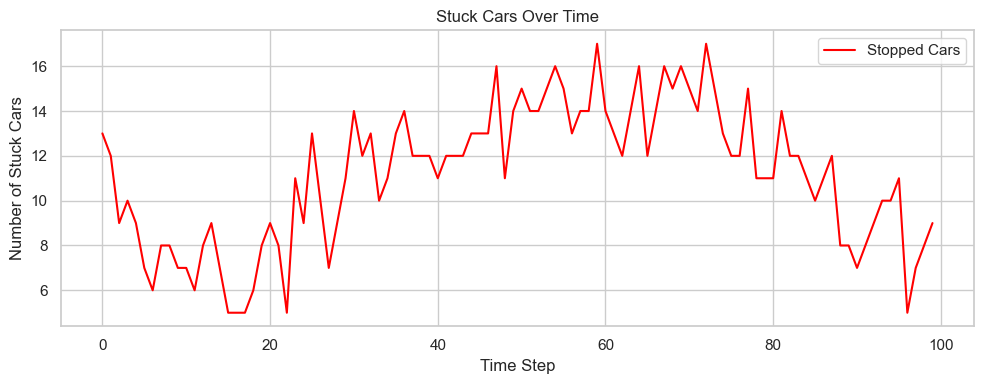

In [11]:
# Final Project: Traffic Congestion Simulation & Complexity Analysis
# Nagel-Schreckenberg Cellular Automaton Model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project Setup --------------------------------------------------------
sns.set_theme(style="whitegrid")
np.random.seed(42)  # Ensure reproducibility of random behavior

# Parameters -----------------------------------------------------------
road_length = 100     # Total number of cells in the circular road
num_cars = 30           # Number of cars initially placed on the road
v_max = 5          # Maximum speed a car can reach
p = 0.3              # Probability of random braking (driver behavior randomness)
time_steps = 100            # Number of simulation steps to run

# Initial Car Placement ------------------------------------------------
# Cars are randomly placed on the road without overlapping
positions = np.random.choice(np.arange(road_length), size=num_cars, replace=False)
positions.sort()
# Cars are also assigned initial speeds randomly from 0 to v_max
speeds = np.random.randint(0, v_max + 1, size=num_cars)

# NaSch Update Rule ----------------------------------------------------
def update_step(positions, speeds, road_length, v_max, p):
    """Applies one full Nagel-Schreckenberg update step."""
    num_cars = len(positions)

    # 1. Acceleration: Each car tries to speed up by 1 unit (unless at max speed)
    speeds = np.minimum(speeds + 1, v_max)

    # 2. Slowing down: Adjust speed based on distance (gap) to the car ahead
    if num_cars > 1:
        gaps = np.empty(num_cars, dtype=int)
        gaps[:-1] = positions[1:] - positions[:-1] - 1
        gaps[-1] = (positions[0] + road_length) - positions[-1] - 1
    else:
        gaps = np.array([road_length - 1], dtype=int)

    speeds = np.where(speeds > gaps, gaps, speeds)

    # 3. Random braking: With probability p, reduce speed by 1 (if speed > 0)
    rand_mask = np.random.rand(num_cars) < p
    speeds = np.where((speeds > 0) & rand_mask, speeds - 1, speeds)

    # 4. Movement: Move cars forward based on updated speeds
    positions = (positions + speeds) % road_length
    order = np.argsort(positions)
    return positions[order], speeds[order]

# Entropy Function --------------------------------------------------------
def shannon_entropy(speeds, v_max):
    """Calculate Shannon entropy of the current speed distribution."""
    counts = np.bincount(speeds, minlength=v_max + 1)
    probabilities = counts[counts > 0] / float(np.sum(counts))
    return -np.sum(probabilities * np.log2(probabilities))

# Gap Calculation ---------------------------------------------------------
def calculate_gaps(positions, road_length):
    """Calculate number of empty cells (gaps) ahead of each car."""
    num_cars = len(positions)
    if num_cars > 1:
        gaps = np.empty(num_cars, dtype=int)
        gaps[:-1] = positions[1:] - positions[:-1] - 1
        gaps[-1] = (positions[0] + road_length) - positions[-1] - 1
    else:
        gaps = np.array([road_length - 1], dtype=int)
    return gaps

# Run Simulation --------------------------------------------------------------
# Lists to collect metrics at each time step
stuck_counts = []     # Number of cars with speed = 0
entropies = []     # Entropy of speed distribution
all_gaps = []    # All gap values observed over time

# Main simulation loop
for t in range(time_steps):
    positions, speeds = update_step(positions, speeds, road_length, v_max, p)
    stuck_counts.append(np.sum(speeds == 0))
    entropies.append(shannon_entropy(speeds, v_max))
    all_gaps.extend(calculate_gaps(positions, road_length))

# Visualization Section --------------------------------------------------------

# Plot: Stuck cars over time
plt.figure(figsize=(10, 4))
plt.plot(stuck_counts, label='Stopped Cars', color='red')
plt.title("Stuck Cars Over Time")
plt.xlabel("Time Step")
plt.ylabel("Number of Stuck Cars")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


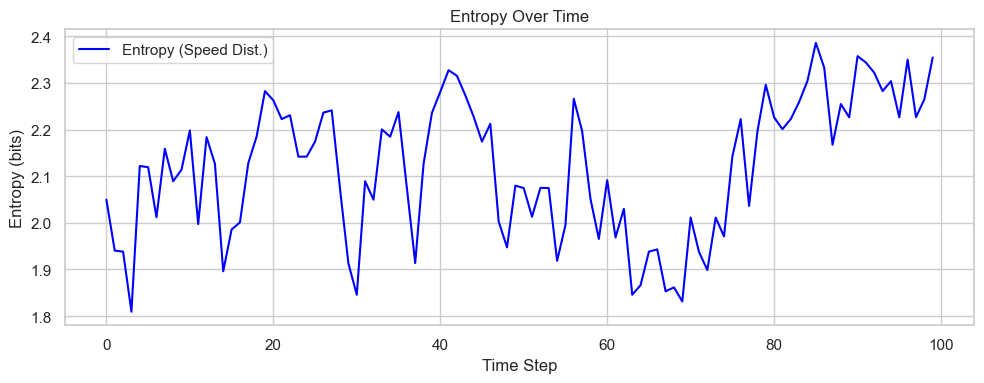

In [8]:
# Plot: Entropy of speed distribution over time
plt.figure(figsize=(10, 4))
plt.plot(entropies, label='Entropy (Speed Dist.)', color='blue')
plt.title("Entropy Over Time")
plt.xlabel("Time Step")
plt.ylabel("Entropy (bits)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


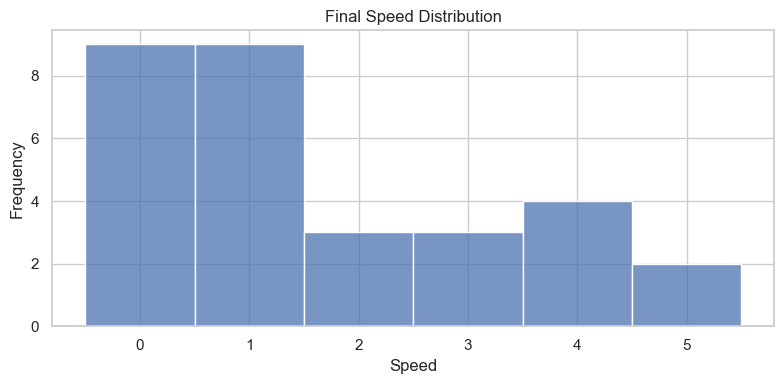

In [9]:

# Plot: Final speed distribution histogram
plt.figure(figsize=(8, 4))
sns.histplot(speeds, bins=np.arange(v_max + 2) - 0.5, discrete=True)
plt.title("Final Speed Distribution")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Average entropy: 2.120 bits
Average number of stuck cars: 11.14 out of 30


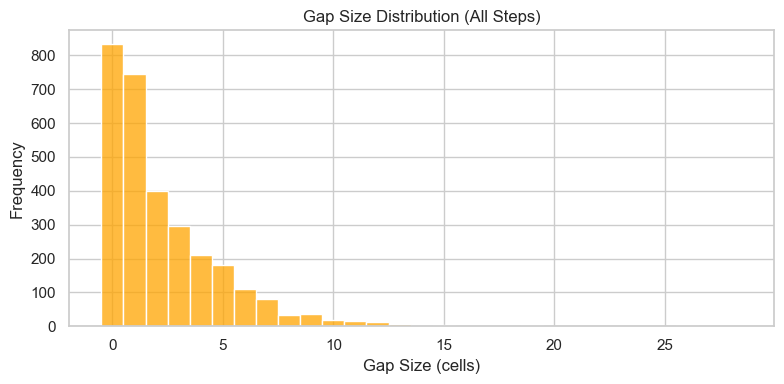

Average entropy: 2.120 bits
Average number of stuck cars: 11.14 out of 30


In [10]:
# Final Summary ---------------------------------------------------------
print(f"Average entropy: {np.mean(entropies):.3f} bits")
print(f"Average number of stuck cars: {np.mean(stuck_counts):.2f} out of {num_cars}")
# Plot: Gap size distribution across all time steps
plt.figure(figsize=(8, 4))
sns.histplot(all_gaps, bins=range(max(all_gaps)+2), discrete=True, color='orange')
plt.title("Gap Size Distribution (All Steps)")
plt.xlabel("Gap Size (cells)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Summary ---------------------------------------------------------
print(f"Average entropy: {np.mean(entropies):.3f} bits")
print(f"Average number of stuck cars: {np.mean(stuck_counts):.2f} out of {num_cars}")

The results show how simple local rules give rise to emergent congestion patterns a classic feature of complex systems.

**Conclusion**
  
This project demonstrates how a simple model can simulate real-world traffic complexity. I used tools from operations research (gap tracking) and information theory (entropy) to measure behavior quantitatively.

It’s a strong example of how emergent patterns arise in complex systems even when each part (car) follows simple rules.

**Animated Traffic Simulation**

In [6]:
import matplotlib.animation as animation

# Setup figure
fig, ax = plt.subplots(figsize=(12, 2))
road_plot = ax.imshow(np.zeros((1, road_length)), cmap='Greys', aspect='auto', vmin=0, vmax=2)
ax.set_title("Traffic Flow Animation")
ax.set_xticks([])
ax.set_yticks([])

# Reinitialize simulation
positions = np.random.choice(np.arange(road_length), size=num_cars, replace=False)
positions.sort()
speeds = np.random.randint(0, v_max + 1, size=num_cars)

# Store all road states
road_states = []

for t in range(time_steps):
    road = np.zeros(road_length)
    for pos in positions:
        road[pos] = 2  # represent car
    road_states.append(road.copy())
    positions, speeds = update_step(positions, speeds, road_length, v_max, p)

# Animation update function
def update(frame):
    road_plot.set_data([road_states[frame]])
    ax.set_title(f"Traffic Flow - Step {frame}")
    return road_plot,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(road_states), interval=150, blit=True)

plt.close()  # Prevent static plot from displaying

# Show animation in notebook
from IPython.display import HTML
HTML(ani.to_jshtml())


**What I Found**

Traffic jams formed dynamically over time emergent behavior occurred from simple rules.

Entropy fluctuated and sometimes dropped when many cars were stuck — meaning lower randomness and more congestion.

Most cars ended up moving slowly (speed 0–1), and gaps between cars were small.

On average, about 11 cars out of 30 were stuck at each time step.

The animation clearly showed clustered traffic and jam zones in real time.